## Lab 1 22.01.2019

Policy for sending after deadline

Lab 1 Deadline 30.01.2019, after -1 point per day, 0 in a week after

### Load the graph

Find and plot PDF and CDF for the following networks:
* [Facebook network](http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt)

0. Load the graph. Plot descriptive statistics for the network (number of vertices, number of edges, number of connected components, radius, diameter, degree distribution, shortest path destribution)

In [2]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
edges = np.loadtxt("fb_Princeton.txt", skiprows=4, dtype="i8,i8")
G = nx.Graph()
G.add_edges_from(edges)


In [62]:
plt.rcParams['figure.figsize']=(12,8)

In [28]:
print('Number of nodes: ',len(G.nodes))
print('Number of edges: ',len(G.edges))
print('Number of connected components: ',len([x for x in nx.connected_components(G)]))
print("Sizes of components' distribution: ", [len(G.subgraph(c).copy()) for c in nx.connected_components(G)])


Number of nodes:  6596
Number of edges:  293320
Number of connected components:  10
Sizes of components' distribution:  [6575, 2, 3, 2, 2, 2, 2, 2, 3, 3]


In [30]:
comps = [G.subgraph(c).copy() for c in nx.connected_components(G)]

G_L = [x for x in sorted(comps, key=lambda y:len(y) )][-1]

In [67]:
nodes = np.random.choice(G_L.nodes, size=1000, replace=False)
shortest_paths=[[len(x) for x in nx.shortest_path(G_L, source=source).values()] for source in nodes]

excentricities = [max(x) for x in shortest_paths]
radius = min(excentricities)
diameter = max(excentricities)

print('Estimated radius of graph: ', radius)
print('Estimated diameter of graph: ', diameter)

Estimated radius of graph:  6
Estimated diameter of graph:  10


Text(0.5,1,'Degree distribution')

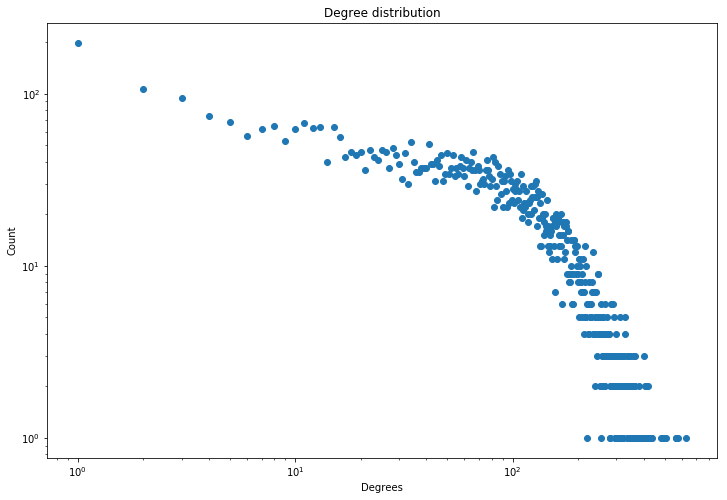

In [102]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.scatter(deg, cnt)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.title('Degree distribution')



(array([1.033e+03, 5.990e+02, 4.740e+02, 5.010e+02, 4.430e+02, 4.590e+02,
        3.860e+02, 3.650e+02, 3.150e+02, 3.110e+02, 2.580e+02, 2.070e+02,
        2.060e+02, 1.800e+02, 1.370e+02, 1.320e+02, 1.000e+02, 7.400e+01,
        7.900e+01, 6.200e+01, 4.300e+01, 3.900e+01, 3.300e+01, 2.600e+01,
        2.200e+01, 1.600e+01, 2.200e+01, 1.600e+01, 1.600e+01, 6.000e+00,
        6.000e+00, 6.000e+00, 8.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  13.54,  26.08,  38.62,  51.16,  63.7 ,  76.24,  88.78,
        101.32, 113.86, 126.4 , 138.94, 151.48, 164.02, 176.56, 189.1 ,
        201.64, 214.18, 226.72, 239.26, 251.8 , 264.34, 276.88, 289.42,
        301.96, 314.5 , 327.04, 339.58, 352.12, 364.66, 377.2 , 389.74,
        402.28, 414.82, 427.36, 439.9 , 452.44, 464.98, 477.52, 490.06,
        502.6 , 

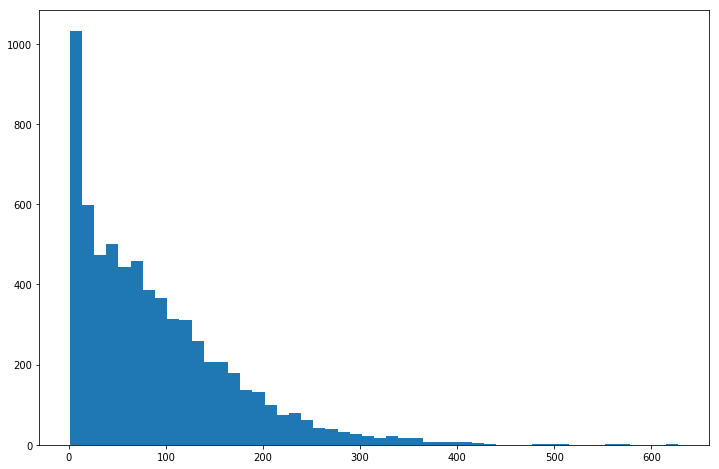

In [100]:
plt.hist(dict(G.degree()).values(),bins=50)

Text(0.5,1,'Shortest paths distribution\nMean=3.6806267680608364')

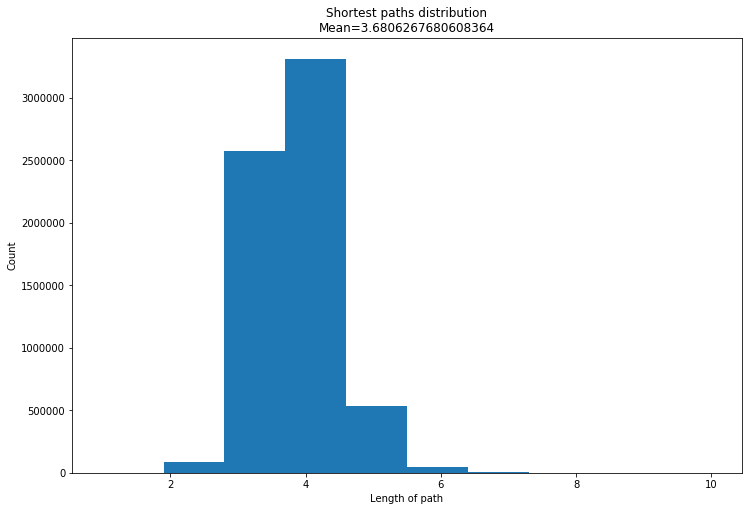

In [95]:
import itertools
shortest_paths_dist = list(itertools.chain(*shortest_paths))
plt.hist(shortest_paths_dist)
plt.xlabel('Length of path')
plt.ylabel('Count')
plt.title(f'Shortest paths distribution\nMean={np.mean(shortest_paths_dist)}')


### Power Law

1) Does it satisfy power law?

2) Find max and mean values of incoming and outcoming node degrees

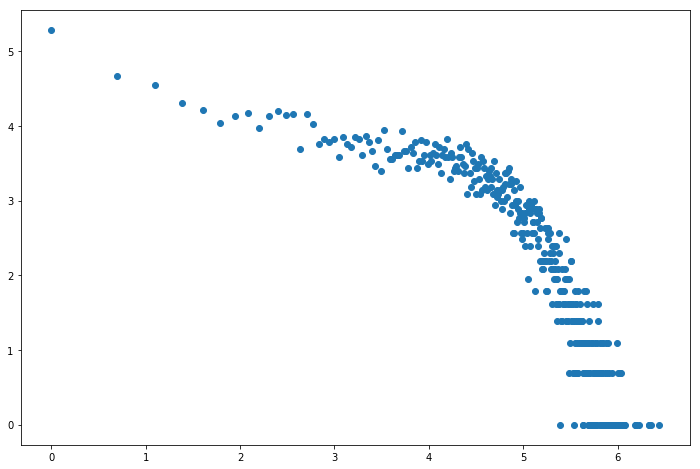

Text(0.5,1,"Does the degree distribution follow power law?\n Nah, doesn't seem so")

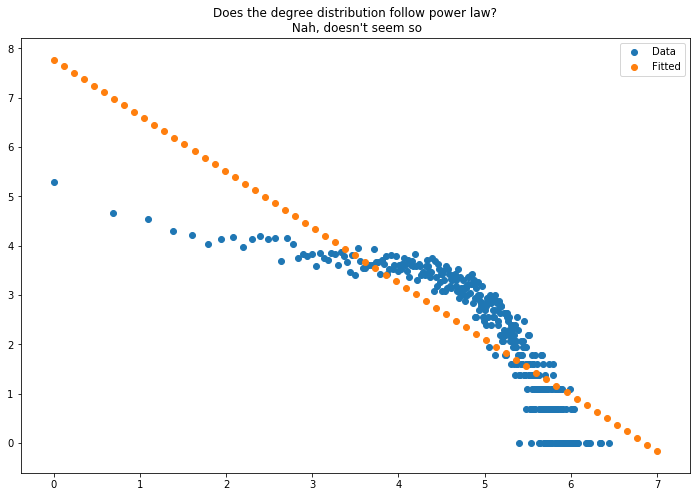

In [120]:

log_degrees=np.log(deg) 
log_counts = np.log(cnt)

lr = stats.linregress(log_degrees, log_counts)
plt.scatter(log_degrees, log_counts, label='Data')
logx=np.linspace(0,7,61)
plt.scatter(logx, logx*lr.slope + lr.intercept, label='Fitted' )
plt.legend()

plt.title("Does the degree distribution follow power law?\n Nah, doesn't seem so")

3) Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

In [138]:
alphas = []
for i in range(1000):
    sampled_nodes_for_ml = np.random.choice(degree_sequence, size=1000)
    x_min = min(sampled_nodes_for_ml)
    n = 1000


    alpha = 1 + n/sum([ np.log(x_i/x_min) for x_i in sampled_nodes_for_ml ])

    alphas.append(alpha)


(array([ 1.,  0.,  1.,  1.,  5.,  8.,  8., 11., 17.,  8., 21., 29., 27.,
        20., 28., 29., 33., 48., 43., 53., 44., 50., 68., 48., 43., 37.,
        49., 45., 32., 33., 31., 20., 16., 28., 13., 16.,  8.,  7.,  4.,
         2.,  3.,  3.,  5.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.24737793, 1.24773055, 1.24808318, 1.2484358 , 1.24878843,
        1.24914105, 1.24949368, 1.2498463 , 1.25019893, 1.25055155,
        1.25090418, 1.25125681, 1.25160943, 1.25196206, 1.25231468,
        1.25266731, 1.25301993, 1.25337256, 1.25372518, 1.25407781,
        1.25443043, 1.25478306, 1.25513568, 1.25548831, 1.25584093,
        1.25619356, 1.25654619, 1.25689881, 1.25725144, 1.25760406,
        1.25795669, 1.25830931, 1.25866194, 1.25901456, 1.25936719,
        1.25971981, 1.26007244, 1.26042506, 1.26077769, 1.26113031,
        1.26148294, 1.26183556, 1.26218819, 1.26254082, 1.26289344,
        1.26324607, 1.26359869, 1.26395132, 1.26430394, 1.26465657,
        1.26500919]),
 <a list of 50

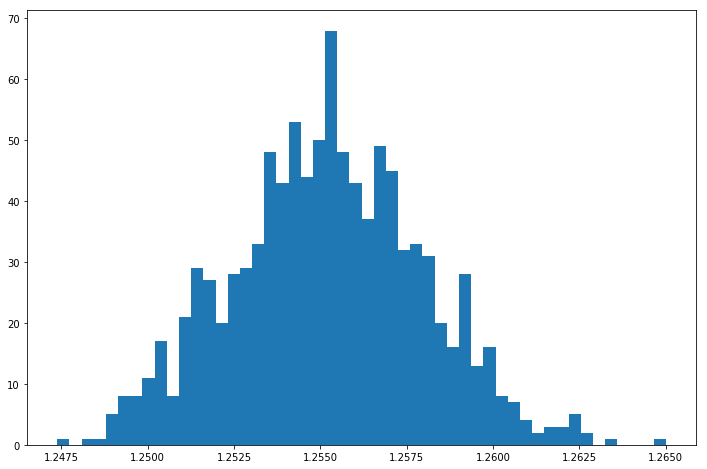

In [139]:
plt.hist(alphas, bins=50)

4) Determine $x_{min}$ via Kolmogorov-Smirnov test

In [7]:
# Put your code here